# Exercise 4 : Multi-layer Networks with Keras

### CIFAR-10

In [1]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
import numpy as np

Load Cifar-10 dataset

In [2]:
((trainX, trainY), (testX, testY)) = cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


In [4]:
trainX.shape, trainX[0].min(), trainX[0].max()

((50000, 32, 32, 3), 0, 255)

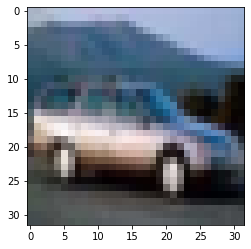

In [10]:
plt.imshow(trainX[4])

In [12]:
trainY[2]

array([9], dtype=uint8)

Modify data to train in MLP model
* Change value range from 0 to 1
* Change data shape to one dimension

In [13]:
trainX = trainX / 255.0
testX = testX / 255.0

In [14]:
trainX = trainX.reshape(-1, 32*32*3)
testX = testX.reshape(-1, 32*32*3)

In [15]:
trainX.shape, trainX.min(), trainX.max()

((50000, 3072), 0.0, 1.0)

Change label to one-hot encoder

In [16]:
trainY[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [18]:
trainY = to_categorical(trainY)
testY = to_categorical(testY)

In [19]:
trainY[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [20]:
labelNames = ["airplane", "automobile", "bird", "cat", "deer",
    "dog", "frog", "horse", "ship", "truck"]

Define the 3072-1024-512-10 architecture using Keras

In [21]:
model = Sequential()

In [24]:
model.add(Dense(1024, activation="relu", input_shape=(3072,)))
model.add(Dense(512, activation="relu"))
model.add(Dense(10, activation="softmax"))

Train the model usign SGD

In [25]:
model.compile(loss="categorical_crossentropy", optimizer=SGD(0.01),
              metrics=["accuracy"])

In [26]:
H = model.fit(trainX, trainY, validation_data=(testX, testY),
              epochs=100, batch_size=32, verbose=1)

Epoch 1/100
1563/1563 [==============================] - 5s 3ms/step - loss: 1.8397 - accuracy: 0.3401 - val_loss: 1.8062 - val_accuracy: 0.3335
Epoch 2/100
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6411 - accuracy: 0.4158 - val_loss: 1.6180 - val_accuracy: 0.4218
Epoch 3/100
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5554 - accuracy: 0.4475 - val_loss: 1.5890 - val_accuracy: 0.4298
Epoch 4/100
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4924 - accuracy: 0.4694 - val_loss: 1.5575 - val_accuracy: 0.4483
Epoch 5/100
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4396 - accuracy: 0.4913 - val_loss: 1.5022 - val_accuracy: 0.4670
Epoch 6/100
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3948 - accuracy: 0.5057 - val_loss: 1.4511 - val_accuracy: 0.4769
Epoch 7/100
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3592 - accuracy: 0.5185 - val_loss: 1.4199 - val_ac

Evaluate the trained network

In [27]:
model.evaluate(testX, testY, batch_size=32)

313/313 [==============================] - 1s 2ms/step - loss: 2.9708 - accuracy: 0.5799


[2.970808982849121, 0.5799000263214111]

In [28]:
predictions = model.predict(testX, batch_size=32)

Use `classification_report` to measure the performance of your model.

In [29]:
print(classification_report(testY.argmax(axis=1),
                            predictions.argmax(axis=1), 
                            target_names=labelNames))

              precision    recall  f1-score   support

    airplane       0.63      0.67      0.65      1000
  automobile       0.70      0.67      0.69      1000
        bird       0.49      0.46      0.47      1000
         cat       0.40      0.41      0.41      1000
        deer       0.52      0.50      0.51      1000
         dog       0.48      0.48      0.48      1000
        frog       0.62      0.66      0.64      1000
       horse       0.64      0.63      0.64      1000
        ship       0.70      0.70      0.70      1000
       truck       0.62      0.62      0.62      1000

    accuracy                           0.58     10000
   macro avg       0.58      0.58      0.58     10000
weighted avg       0.58      0.58      0.58     10000



Plot the training loss and accuracy

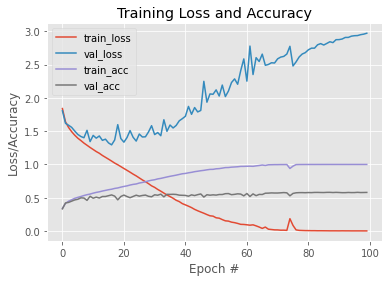

In [30]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 100), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 100), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()